In [239]:
import ms.version
ms.version.addpkg('numpy', '1.14.2')
ms.version.addpkg('pandas', '0.22.0')
ms.version.addpkg('dateutil', '2.7.2')
ms.version.addpkg('six', '1.11.0-ms1')
ms.version.addpkg('pytz', '2017.3')
ms.version.addpkg('matplotlib', '2.2.2')
ms.version.addpkg('pyparsing', '2.2.0')
ms.version.addpkg('cycler', '0.10.0')
ms.version.addpkg('kiwisolver', '1.0.1')
ms.version.addpkg('scipy', '1.0.0')
ms.version.addpkg('sklearn', '0.19b2')


In [243]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
dataarrayx = pd.read_csv("datax3poly.csv").values.tolist()
dataarrayy = pd.read_csv("datay3poly.csv").values.tolist()
print(np.shape(dataarrayx))
print(np.shape(dataarrayy))
#print(dataarrayy)

(500, 3)
(500, 1)


In [279]:
#deg = [1,3,6]
#for d in deg:
regrpoly = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression())])
regrpoly.fit(dataarrayx, dataarrayy)

predy = regrpoly.predict(dataarrayx)
print(sklearn.metrics.mean_squared_error(dataarrayy,predy))


0.31032801205615074


In [281]:
regr = LinearRegression(fit_intercept=True, normalize=True)
poly = PolynomialFeatures(2)
polyx = poly.fit_transform(dataarrayx)

regr.fit(polyx, dataarrayy)
predy = regr.predict(polyx)
print(regr.coef_)
print(sklearn.metrics.mean_squared_error(dataarrayy,predy))
print(regr.intercept_)

[[ 0.         -0.01835764 -0.27690425  0.26498952 -1.02430322  0.30353541
   3.03193538  5.05146575  0.13774791  0.02116398]]
0.31032801205615124
[1.712752]


In [282]:
regr = LinearRegression(fit_intercept=True, normalize=True)
poly = PolynomialFeatures(2)
polyx = poly.fit_transform(dataarrayx)
#print(polyx)
scaler= sklearn.preprocessing.StandardScaler()
print(scaler.fit(polyx))
polyxscaled = scaler.transform(polyx)
#print(a)
regr.fit(polyxscaled, dataarrayy)
predy = regr.predict(polyxscaled)
print(regr.coef_)
print(sklearn.metrics.mean_squared_error(dataarrayy,predy))
print(regr.intercept_)


StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.00000000e+00 -5.20155806e-03 -1.59700666e-01  1.56477344e-01
  -3.00834922e-01  2.71611374e-01  2.74428522e+00  1.76424238e+01
   3.43945208e-01  7.49013182e-02]]
0.31032801205615124
[53.10527619]


In [290]:
ridge = linear_model.Ridge (alpha = 0.5)
ridge.fit(polyxscaled, dataarrayy)
predy = ridge.predict(polyxscaled)

print(ridge.coef_)
print(ridge.intercept_)
print(sklearn.metrics.mean_squared_error(dataarrayy,predy))

[[ 0.00000000e+00  1.31312660e-03 -1.99094983e+00  1.50903195e-01
  -2.68994370e-01  2.73611635e-01  2.69424684e+00  1.57818209e+01
   3.14695455e-01  7.92508151e-02]]
[53.10527619]
0.33619831485854024


In [128]:

from math import sin
# create samples
sample_size = 100
err_sigma = 0.1
x = 12*np.random.rand(sample_size, 1)
err = err_sigma*np.random.randn(sample_size, 1)
func = np.vectorize(sin)
y = func(x) + err

In [122]:
#a = np.random.rand(sample_size, 1)
#b = np.random.rand(sample_size, 2)
#print(b)
#plt.plot(a, b, 'o')

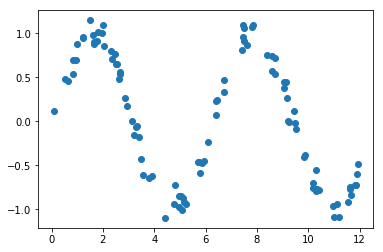

In [129]:
# plot train data
plt.plot(x, y, 'o')

In [130]:
# train linear regression models with different polynomial basis
deg = [1,3,6]

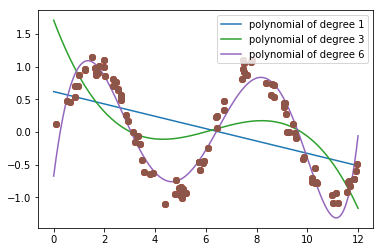

In [140]:
for d in deg:
    regr = Pipeline([('poly', PolynomialFeatures(degree=d)),('linear', LinearRegression())])
    regr.fit(x, y)
    
    # make predictions
    xt = np.linspace(0.0, 12.0, num=1000).reshape((1000, 1))
    yt = regr.predict(xt)
    # plot regression result
    plt.plot(xt, yt, label='polynomial of degree %d' % (d))
    plt.plot(x, y, 'o')
plt.legend()
plt.show()

In [163]:
print(regr.coef_)

AttributeError: 'Pipeline' object has no attribute 'coef_'